# Fast Fourier Transform

The answer to how FFT speedup the computing of DFT lies in the exploitation of the symmetries in the DFT. Let’s take a look of the symmetries in the DFT. From the definition of the DFT equation

$$
X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}}
$$

we can calculate the

$$
X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{(k+N)n/N}}} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{n}}\cdot e^{-i2\pi{kn/N}}}
$$

Since $e^{-i2\pi{n}} = 1$, we have

$$
X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = X_k
$$

with a little extension, we can have

$$
X_{k+i\cdot N} = X_k, \text{ for any integer i}
$$

This means that within the DFT, we clearly have some symmetries that we can use to reduce the computation.

## Tricks in FFT

$$
\begin{array}{l}
X_{k} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} \\ = \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{k(2m)/N}}} + \sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{k(2m+1)/N}}} \\ = \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{km/(N/2)}}} + e^{-i2\pi{k/N}}\sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{km/(N/2)}}}
\end{array}
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set()

In [2]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

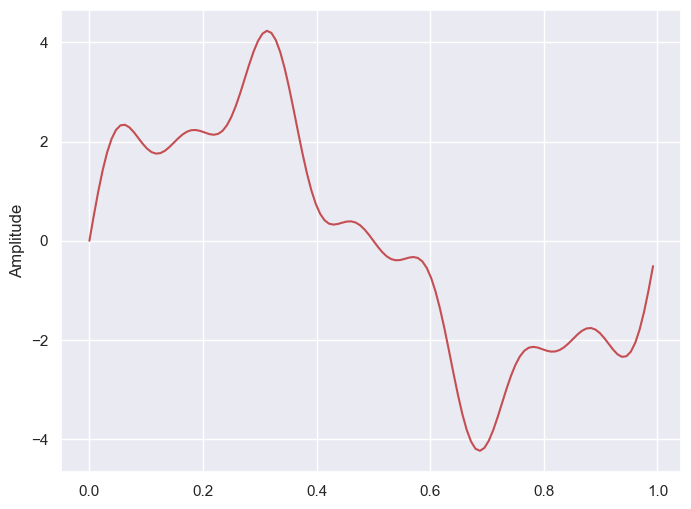

In [3]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

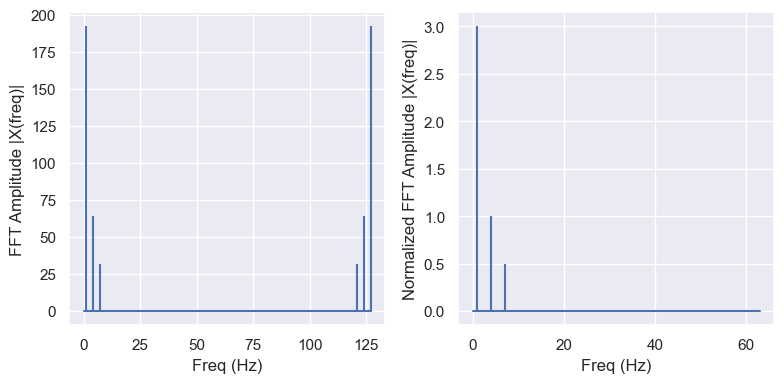

In [7]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.stem(
    freq, abs(X), 
    linefmt='b', 
    markerfmt=" ", 
    basefmt="-b"
) 
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(
    f_oneside, abs(X_oneside), 
    linefmt='b', 
    markerfmt=" ", 
    basefmt="-b"
) 
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

## Test of FFT

So fast here.

In [8]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [11]:
# sampling rate = 2048  must be power of 2
sr = 2048
%timeit FFT(gen_sig(sr)) # use %timeit to get the running time

18.4 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
# sampling rate = 2 ** 15  must be power of 2
sr = 2 ** 15
%timeit FFT(gen_sig(sr)) # use %timeit to get the running time

303 ms ± 4.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
2 ** 15

32768